In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
df = pd.read_csv('DataCorrect_1.csv', sep=';', header=0)
data = df.to_numpy()

In [78]:
df

,WrongProj,All 1NN correct,All 2NN correct,All 3NN correct,All 4NN correct,#1-NN wrong,#up-to-4-NN wrong,DateTime,Timestamp,#Queries,#PointsInTree,VectorSize,TimeKernel,TimeHost,Speedup
0,0,1,1,1,1,0,0,Thu Aug 25 16:17:38 2022,1661437058,1,100,32,0.968677,0.642553,0.663330
1,0,1,1,1,1,0,0,Thu Aug 25 16:17:41 2022,1661437061,1,100,32,1.047980,0.716563,0.683758
2,0,1,1,1,1,0,0,Thu Aug 25 16:17:45 2022,1661437065,1,100,32,1.084140,0.667382,0.615589
3,0,1,1,1,1,0,0,Thu Aug 25 16:17:48 2022,1661437068,1,100,80,0.964328,0.715485,0.741952
4,0,1,1,1,1,0,0,Thu Aug 25 16:17:52 2022,1661437072,1,100,80,1.036510,0.657535,0.634376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,16,1,1,1,1,0,0,Thu Aug 25 17:29:04 2022,1661441344,7000,999,800,10816.300000,31880.600000,2.947450
221,20,1,1,1,1,0,0,Thu Aug 25 17:30:26 2022,1661441426,7000,1000,800,10791.700000,31609.400000,2.929060
222,51,1,1,1,1,0,0,Thu Aug 25 17:31:51 2022,1661441511,7000,1000,1024,10958.600000,32234.200000,2.941450
223,61,1,1,1,1,0,0,Thu Aug 25 17:33:15 2022,1661441595,7000,1000,1024,10881.300000,32612.700000,2.997140


In [84]:
grouped = df.groupby(['#PointsInTree','#Queries','VectorSize']).mean()

In [87]:
len(df)

225

In [93]:
(0.663330+0.683758+0.615589)/3

0.6542256666666666

In [92]:
grouped

WrongProj  All 1NN correct  \
#PointsInTree #Queries VectorSize                               
100           1        32           0.000000              1.0   
                       80           0.000000              1.0   
                       160          0.000000              1.0   
                       800          0.000000              1.0   
                       1024         0.000000              1.0   
...                                      ...              ...   
1000          7000     32           0.000000              1.0   
                       80           0.000000              1.0   
                       160          0.000000              1.0   
                       800         22.000000              0.5   
                       1024        57.333333              1.0   

                                   All 2NN correct  All 3NN correct  \
#PointsInTree #Queries VectorSize                                     
100           1        32                      1.0              1.0   
                       80                      1.0              1.0   
                       160                     1.0              1.0   
                       800                     1.0              1.0   
                       1024                    1.0              1.0   
...                                            ...              ...   
1000          7000     32                      1.0              1.0   
                       80                      1.0              1.0   
                       160                     1.0              1.0   
                       800                     1.0              1.0   
                       1024                    1.0              1.0   

                                   All 4NN correct  #1-NN wrong  \
#PointsInTree #Queries VectorSize                                 
100           1        32                      1.0          0.0   
                       80                      1.0          0.0   
                       160                     1.0          0.0   
                       800                     1.0          0.0   
                       1024                    1.0          0.0   
...                                            ...          ...   
1000          7000     32                      1.0          0.0   
                       80                      1.0          0.0   
                       160                     1.0          0.0   
                       800                     1.0          0.5   
                       1024                    1.0          0.0   

                                   #up-to-4-NN wrong     Timestamp  \
#PointsInTree #Queries VectorSize                                    
100           1        32                        0.0  1.661437e+09   
                       80                        0.0  1.661437e+09   
                       160                       0.0  1.661437e+09   
                       800                       0.0  1.661437e+09   
                       1024                      0.0  1.661437e+09   
...                                              ...           ...   
1000          7000     32                        0.0  1.661441e+09   
                       80                        0.0  1.661441e+09   
                       160                       0.0  1.661441e+09   
                       800                       0.0  1.661441e+09   
                       1024                      0.0  1.661442e+09   

                                     TimeKernel      TimeHost   Speedup  
#PointsInTree #Queries VectorSize                                        
100           1        32              1.033599      0.675499  0.654226  
                       80              1.026186      0.687831  0.672335  
                       160             0.988890      0.609875  0.615229  
                       800             0.952409      0.657879  0.690022  
                       1024           

Parameters are:
- #Queries
- #PointsInTree
- VectorSize

## Fix wector size = 32

In [ ]:
(32,80,160,800,1024)

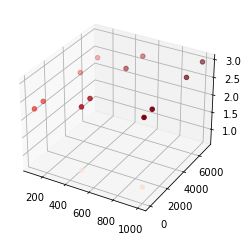

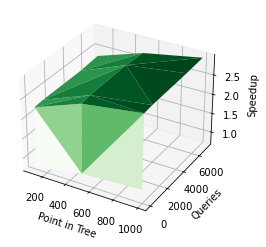

In [100]:
v32 = df.loc[df['VectorSize']==1024].groupby(['#PointsInTree','#Queries','VectorSize'], as_index=False).mean()

ax = plt.axes(projection='3d')
zdata = v32['Speedup']
xdata = v32['#PointsInTree']
ydata = v32['#Queries']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Point in Tree')
ax.set_ylabel('Queries')
ax.set_zlabel('Speedup')
ax.plot_trisurf(xdata, ydata, zdata, cmap='Greens');
plt.show()

# Fix Points in Tree = 1000

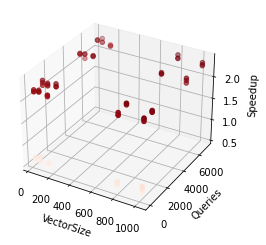

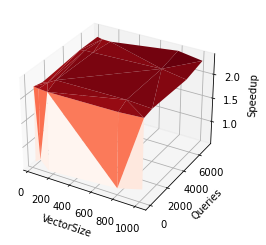

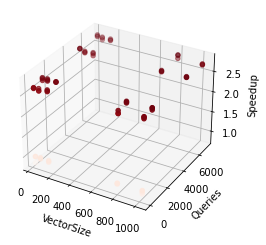

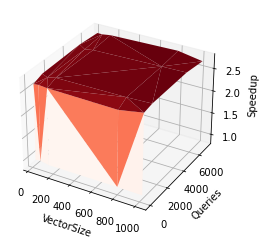

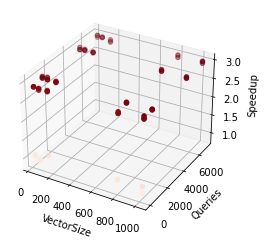

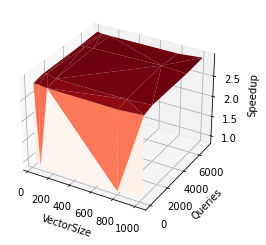

In [69]:
for x in (100,500,1000):

    p1000 = df.loc[df['#PointsInTree']==x]

    ax = plt.axes(projection='3d')
    zdata = p1000['Speedup']
    xdata = p1000['VectorSize']
    ydata = p1000['#Queries']
    ax.set_xlabel('VectorSize')
    ax.set_ylabel('Queries')
    ax.set_zlabel('Speedup')
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('VectorSize')
    ax.set_ylabel('Queries')
    ax.set_zlabel('Speedup')
    ax.plot_trisurf(xdata, ydata, zdata, cmap='Reds');
    plt.show()